# First import the necessary library

In [1]:
from onset_functions import *
import onset_widgets as w

# Choose spacecraft:

In [2]:
display(w.spacecraft_dropdown())

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'Bepicolombo', 'SOHO'), …

# Choose the sensor, particle species and viewing direction:

In [20]:
display(w.sensor_dropdown(w.spacecraft_drop.value))

Dropdown(description='Sensor:', options=('EPT', 'HET'), value='EPT')

In [21]:
display(w.species_dropdown((w.spacecraft_drop.value,w.sensor_drop.value)))

Dropdown(description='Species:', options=('p', 'e'), value='p')

In [22]:
display(w.viewing_dropdown((w.spacecraft_drop.value,w.sensor_drop.value)))

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

# Set the date of the event and path to your data folder:

In [52]:
# Date of the event as an integer YYYYMMDD
event_date = 20210715

# Path for the downloaded data
data_path = f"{os.getcwd()}"

# Path to save plots
plot_path = f'{os.getcwd()}/'

# See that the input is correct:

In [53]:
w.update_and_display_input(event_date, data_path, plot_path)

You've chosen the following options:
Spacecraft: solo
Sensor: EPT
Species: p
Viewing: sun
Event_date: 20210715
Data_path: /home/chospa/Documents/Github/SPOT
Plot_path: /home/chospa/Documents/Github/SPOT/


In [54]:
# Plot time range:
sdate = datetime.date(2021, 7, 15)
edate = datetime.date(2021, 7, 16)

# Get event data:
event_onset = Event(spacecraft='solo', sensor='ept', 
                    data_level='l2', species = 'p',
                    start_date=sdate, end_date=edate, 
                    data_path=data_path)

ValueError: read length must be non-negative or -1

# Set the temporal range for the plot and create the Event object:

In [31]:
# Plot time range:
sdate = datetime.date(2021, 7, 15)
edate = datetime.date(2021, 7, 16)
plot_range = [datetime.datetime(2021, 7, 15, 0),datetime.datetime(2021, 7, 16, 0)]

# Get event data:
event_onset = Event(spacecraft=w.input_dict["Spacecraft"], sensor=w.input_dict["Sensor"], 
                    data_level='l2', species = w.input_dict["Species"],
                    start_date=sdate, end_date=edate, 
                    data_path=w.input_dict["Data_path"])

Creating dir /home/chospa/Documents/Github/SPOT/l2/epd/ept/l2/epd/ept/


solo_L2_epd-ept-asun-rates_20210715_V01.cdf: 1.29MB [00:01, 650kB/s]            
solo_L2_epd-ept-asun-rates_20210716_V01.cdf: 2.88MB [00:03, 892kB/s]            
solo_L2_epd-ept-north-rates_20210715_V01.cdf: 1.29MB [00:04, 308kB/s]           
solo_L2_epd-ept-north-rates_20210716_V01.cdf: 2.98MB [00:06, 454kB/s]           
solo_L2_epd-ept-south-rates_20210715_V01.cdf: 1.29MB [00:04, 320kB/s]           
solo_L2_epd-ept-south-rates_20210716_V01.cdf: 3.06MB [00:07, 394kB/s]           
solo_L2_epd-ept-sun-rates_20210715_V01.cdf: 1.31MB [00:02, 610kB/s]             
solo_L2_epd-ept-sun-rates_20210716_V01.cdf: 3.59MB [00:03, 944kB/s]             


In [38]:
# I'm not sure what to do with this. -Christian

#Particle type for filename
particle_type = 'ERNE-HED_p'
particle_ch = [0,1] #[3, 4]
#Add particle specific folder to file path
#file_path = file_path + particle_type + '_' + str(event_date) + '/'

# Set the resampling period:

In [39]:
# Use pandas-compatible resampling period string, e.g. '10min' or '30s'
# Leave to None to not resample data
averaging = '10min'

# Determine and adjust background start and length in hours (e.g. 3, 8.1)

In [40]:
background_start = 1
background_length = 16

solo
solo
True
ept
ept
True
p
e
False
##### >Energy channels< #####
0.0485 - 0.0580 MeV
#############################

##### >Flux peak< #####
                            flux
Time                            
2021-07-15 04:05:00  2065.930908
#######################

##### >Onset time< #####
2021-07-16 04:55:00
########################

##### >Mean of background intensity< #####
773.26556
##########################################

##### >Std of background intensity< #####
333.33902
#########################################

##### >Particle species< #####
protons
##############################



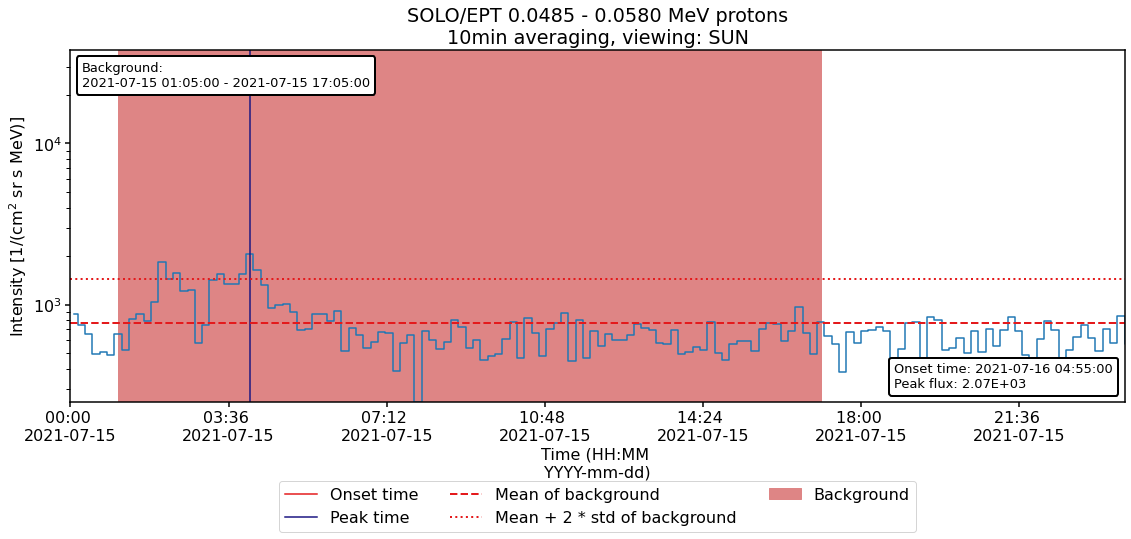

In [41]:
#Generate event plots for different viewing directions

flux, onset_stats, onset_found, peak_flux, peak_time, fig, bg_mean = event_onset.analyse(viewing=w.input_dict["Viewing"], bg_start=background_start, bg_length=background_length, channels=particle_ch,
                                                                                         resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range)
onset = onset_stats[-1]
peak_flux = peak_flux.values[0]
output = event_onset.output

# output is a dictionary, that contains 'flux_series', 'onset_stats', 'onset_found', 'onset', 'peak_flux', 'peak_time', 'fig' and 'bg_mean'

In [13]:
print(f"Onset: {output['onset']}")
print(f"Peak flux: {output['peak_flux']:.2e}")
print(f"Peak time: {output['peak_time']}")
print(f"Bg mean: {output['bg_mean']:.2e}")

Onset: 2021-07-16 15:25:00
Peak flux: 3.72e-03
Peak time: 2021-07-16 19:55:00
Bg mean: 2.54e-04


In [16]:
output['bg_mean']

0.00025350504

# Saving figures

In [36]:
# Use a pre-generated name for the file:
file_name = f"{w.input_dict['Plot_path']}{w.input_dict['Spacecraft']}_{particle_type}_{event_date}_{averaging}.png"

# Or type your own here:
# file_name = ""

In [37]:
# Check that the name is right
file_name

'/home/chospa/Documents/Github/SPOT/SOHO_ERNE-HED_p_20210715_10min.png'

In [38]:
#Save maximum peak flux plot
fig.savefig(file_name, facecolor= 'white', transparent=False)